In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')

import seaborn as sns
color = sns.color_palette()
sns.set(rc = {'figure.figsize' : (25, 15)})

import plotly
plotly.offline.init_notebook_mode(connected = True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf

import warnings
warnings.filterwarnings('ignore')

import scipy.stats

In [7]:
df = pd.read_csv('C:/Users/Maxim/Downloads/google-play-store-apps/googleplaystore.csv')

In [13]:
df.drop_duplicates(subset = 'App', inplace = True)
df = df[df['Android Ver'] != np.nan]
df = df[df['Android Ver'] != 'NaN']
df = df[df['Installs'] != 'Free']
df = df[df['Installs'] != 'Paid']

df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [15]:
df['Installs'] = df['Installs'].apply(lambda x: x.replace('+','')
                                     if '+' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: x.replace(',','')
                                     if ',' in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x: int(x))

In [16]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)

df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k',''))/1000
                              if 'k' in str(x) else float(x))

In [17]:
df['Installs']= df['Installs'].apply(lambda x: float(x))

In [18]:
df['Price'] = df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
df['Price'] = df['Price'].apply(lambda x: float(x))

In [19]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

ValueError: array must not contain infs or NaNs

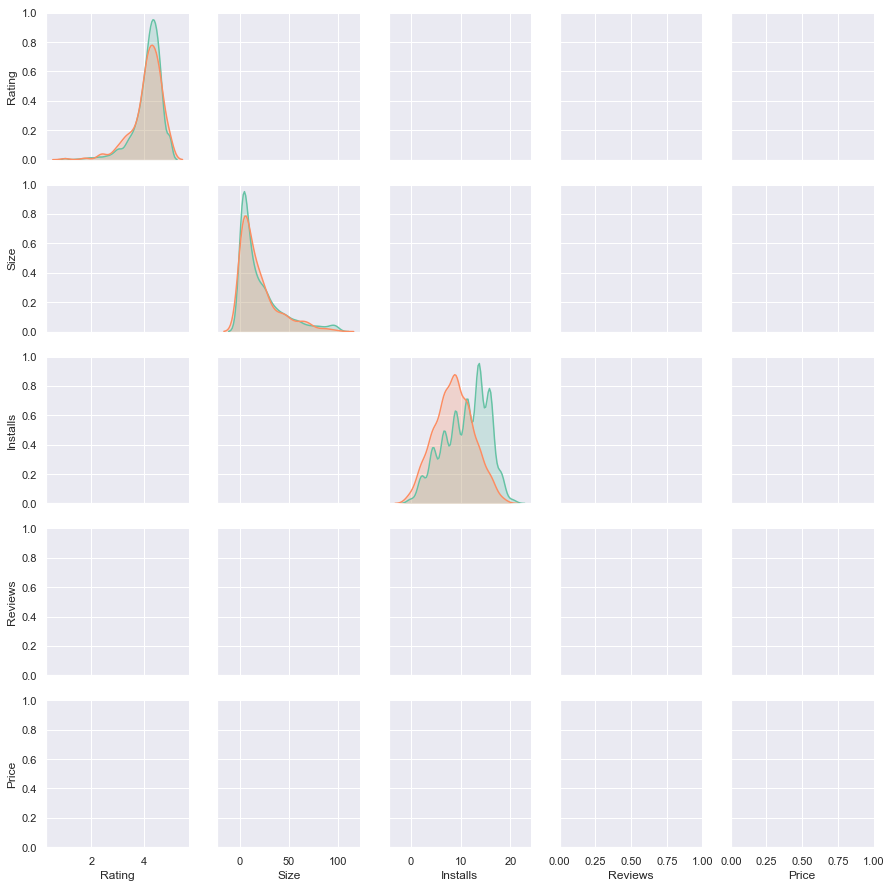

In [28]:
x = df['Rating'].dropna()
y = df['Size'].dropna()
z = df['Installs'][df.Installs != 0].dropna()
p = df['Reviews'][df.Installs != 0].dropna()
t = df['Type'].dropna()
price = df['Price'].dropna()

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                             columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

In [27]:
len(df) - df.count()
len(df)

9659

In [30]:
num_cats = df['Category'].value_counts().sort_values(ascending = True)
data = [go.Pie(
labels = num_cats.index,
values = num_cats.values,
hoverinfo = 'label+value'
)]

plotly.offline.iplot(data, filename = 'active_category')

In [39]:
data = [go.Histogram(
x = df.Rating,
xbins = {'start':1, 'size':0.1, 'end':5.1}
)]

plotly.offline.iplot(data, filename='abc')

In [70]:
def mean_con(dat, confidence = 0.95):
    a =  1.0 * np.array(dat)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    
    return m, m-h, m+h

mean_con(df['Rating'].dropna())

(4.173243045387993, 4.161623692349456, 4.184862398426531)

In [83]:
groups = df.groupby('Category').filter(lambda x: len(x) >= 170).reset_index()

c = ['hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 720, len(set(groups.Category)))]

layout = {'title': 'App ratings across major categories',
         'xaxis': {'tickangle':-40},
        'yaxis': {'title': 'Rating'},
          'plot_bgcolor': 'rgb(250,250,250)',
          'shapes': [{
              'type' :'line',
              'x0': -.5,
              'y0': np.nanmean(list(groups.Rating)),
              'x1': 19,
              'y1': np.nanmean(list(groups.Rating)),
              'line': { 'dash': 'dashdot'}
          }]
          }



4.170026786973072

[(0,
  ('ART_AND_DESIGN',
                                                       App        Category  \
   0        Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
   1                                   Coloring book moana  ART_AND_DESIGN   
   2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
   3                                 Sketch - Draw & Paint  ART_AND_DESIGN   
   4                 Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
   5                            Paper flowers instructions  ART_AND_DESIGN   
   6               Smoke Effect Photo Maker - Smoke Editor  ART_AND_DESIGN   
   7                                      Infinite Painter  ART_AND_DESIGN   
   8                                  Garden Coloring Book  ART_AND_DESIGN   
   9                         Kids Paint Free - Drawing Fun  ART_AND_DESIGN   
   10                              Text on Photo - Fonteee  ART_AND_DESIGN   
   11              Name Art Photo Edit